In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [2]:
df=pd.read_excel('일반음식점_filtered.xlsx')

In [3]:
df.head()

,Unnamed: 0,번호,개방서비스명,개방서비스ID,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,9,10,일반음식점,07_24_04_P,3000000,3000000-101-1984-04502,19841217,NaN,1,영업/정상,...,NaN,NaN,NaN,NaN,NaN,N,90.06,NaN,NaN,NaN
1,12,13,일반음식점,07_24_04_P,3000000,3000000-101-1984-04720,19841220,NaN,1,영업/정상,...,NaN,NaN,NaN,NaN,NaN,N,68.73,NaN,NaN,NaN
2,40,41,일반음식점,07_24_04_P,3000000,3000000-101-2001-12264,20011019,NaN,1,영업/정상,...,NaN,NaN,NaN,NaN,NaN,N,0.00,NaN,NaN,NaN
3,42,43,일반음식점,07_24_04_P,3000000,3000000-101-2001-12274,20011027,NaN,1,영업/정상,...,NaN,NaN,NaN,NaN,NaN,N,103.40,NaN,NaN,NaN
4,54,55,일반음식점,07_24_04_P,3000000,3000000-101-2002-12019,20020507,NaN,1,영업/정상,...,NaN,NaN,NaN,NaN,NaN,N,64.00,NaN,NaN,NaN


In [4]:
df.columns

Index(['Unnamed: 0', '번호', '개방서비스명', '개방서비스ID', '개방자치단체코드', '관리번호', '인허가일자',
       '인허가취소일자', '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자',
       '휴업종료일자', '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소',
       '도로명우편번호', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(X)',
       '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수', '영업장주변구분명', '등급구분명', '급수시설구분명',
       '총종업원수', '본사종업원수', '공장사무직종업원수', '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명',
       '보증액', '월세액', '다중이용업소여부', '시설총규모', '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')

In [5]:
df=df.loc[:,['영업상태구분코드','영업상태명','소재지전체주소','도로명전체주소']]

In [6]:
df.head()

,영업상태구분코드,영업상태명,소재지전체주소,도로명전체주소
0,1,영업/정상,서울특별시 종로구 관철동 19-6번지,서울특별시 종로구 삼일대로17길 36 (관철동)
1,1,영업/정상,서울특별시 종로구 관철동 13-9번지,서울특별시 종로구 삼일대로19길 17 (관철동)
2,1,영업/정상,서울특별시 종로구 창신동 687-4번지,서울특별시 종로구 창신길 15 (창신동)
3,1,영업/정상,서울특별시 종로구 동숭동 1-65번지,서울특별시 종로구 대학로10길 15-15 (동숭동)
4,1,영업/정상,서울특별시 종로구 관수동 120번지,NaN


In [7]:
df['소재지(구)']=df['소재지전체주소'].str.split(' ').str[1]

In [8]:
df['소재지(동)']=df['소재지전체주소'].str.split(' ').str[2]

In [9]:
df.head()

,영업상태구분코드,영업상태명,소재지전체주소,도로명전체주소,소재지(구),소재지(동)
0,1,영업/정상,서울특별시 종로구 관철동 19-6번지,서울특별시 종로구 삼일대로17길 36 (관철동),종로구,관철동
1,1,영업/정상,서울특별시 종로구 관철동 13-9번지,서울특별시 종로구 삼일대로19길 17 (관철동),종로구,관철동
2,1,영업/정상,서울특별시 종로구 창신동 687-4번지,서울특별시 종로구 창신길 15 (창신동),종로구,창신동
3,1,영업/정상,서울특별시 종로구 동숭동 1-65번지,서울특별시 종로구 대학로10길 15-15 (동숭동),종로구,동숭동
4,1,영업/정상,서울특별시 종로구 관수동 120번지,NaN,종로구,관수동


In [10]:
df[df['소재지(구)'].isna()]

,영업상태구분코드,영업상태명,소재지전체주소,도로명전체주소,소재지(구),소재지(동)
72,1,영업/정상,NaN,"서울특별시 종로구 진흥로 442-2, 1층 (구기동)",NaN,NaN
2881,1,영업/정상,NaN,"서울특별시 성북구 보문사길 111 (보문동6가, 보문파크뷰자이아파트 상가8호)",NaN,NaN
4901,1,영업/정상,NaN,"서울특별시 서대문구 성산로 316, 1층 (연희동)",NaN,NaN
5526,1,영업/정상,NaN,"서울특별시 마포구 잔다리로 19, 2층 (서교동)",NaN,NaN
5602,1,영업/정상,NaN,"서울특별시 마포구 성미산로17길 99 (연남동, 1층일부)",NaN,NaN
5698,1,영업/정상,NaN,"서울특별시 마포구 도화4길 27, 1층 (도화동)",NaN,NaN
7020,1,영업/정상,NaN,서울특별시 구로구 오리로 1173 (오류동),NaN,NaN


In [11]:
df[df['소재지(동)'].isna()]

,영업상태구분코드,영업상태명,소재지전체주소,도로명전체주소,소재지(구),소재지(동)
72,1,영업/정상,NaN,"서울특별시 종로구 진흥로 442-2, 1층 (구기동)",NaN,NaN
2881,1,영업/정상,NaN,"서울특별시 성북구 보문사길 111 (보문동6가, 보문파크뷰자이아파트 상가8호)",NaN,NaN
4901,1,영업/정상,NaN,"서울특별시 서대문구 성산로 316, 1층 (연희동)",NaN,NaN
5526,1,영업/정상,NaN,"서울특별시 마포구 잔다리로 19, 2층 (서교동)",NaN,NaN
5602,1,영업/정상,NaN,"서울특별시 마포구 성미산로17길 99 (연남동, 1층일부)",NaN,NaN
5698,1,영업/정상,NaN,"서울특별시 마포구 도화4길 27, 1층 (도화동)",NaN,NaN
7020,1,영업/정상,NaN,서울특별시 구로구 오리로 1173 (오류동),NaN,NaN


In [12]:
df[df['소재지(구)'].isna()]['도로명전체주소'].str.split(' ').str[1]

72       종로구
2881     성북구
4901    서대문구
5526     마포구
5602     마포구
5698     마포구
7020     구로구
Name: 도로명전체주소, dtype: object

In [13]:
df[df['소재지(구)'].isna()]['소재지(구)']

72      NaN
2881    NaN
4901    NaN
5526    NaN
5602    NaN
5698    NaN
7020    NaN
Name: 소재지(구), dtype: object

In [14]:
nagus=list(df[df['소재지(구)'].isna()]['도로명전체주소'].str.split(' ').str[1].copy())

-----------------------------------------

In [15]:
# df[df['소재지(동)'].isna()]['도로명전체주소'].str.search("()")

AttributeError: 'StringMethods' object has no attribute 'search'

In [18]:
indexs=df[df['소재지(구)'].isna()]['소재지(구)'].index

In [19]:
indexs

Int64Index([72, 2881, 4901, 5526, 5602, 5698, 7020], dtype='int64')

In [20]:
for x in range(7):
    df.loc[indexs[x],'소재지(구)']=nagus[x]

In [23]:
gus=df['소재지(구)'].value_counts()

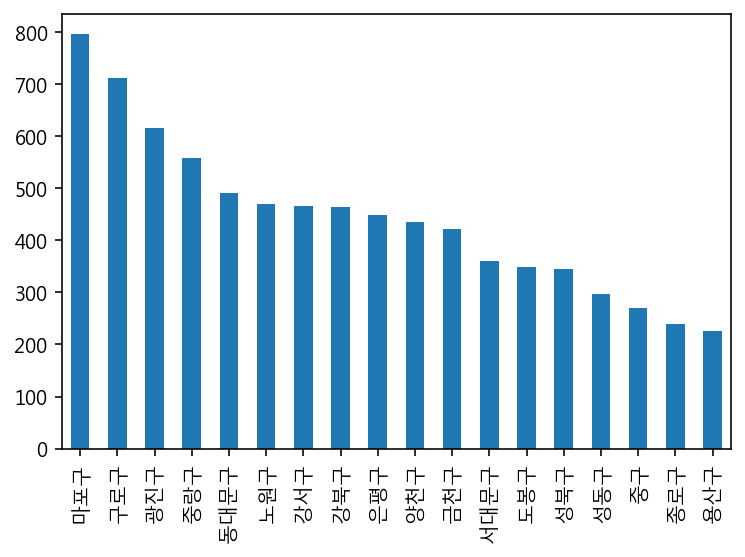

In [24]:
gus.plot(kind='bar')

In [36]:
ingu=input()

강서구


In [41]:
dongs=df[df['소재지(구)']==ingu]['소재지(동)'].value_counts()

In [42]:
dongs

화곡동     221
마곡동      69
방화동      50
등촌동      46
공항동      28
내발산동     27
가양동      15
염창동       9
Name: 소재지(동), dtype: int64

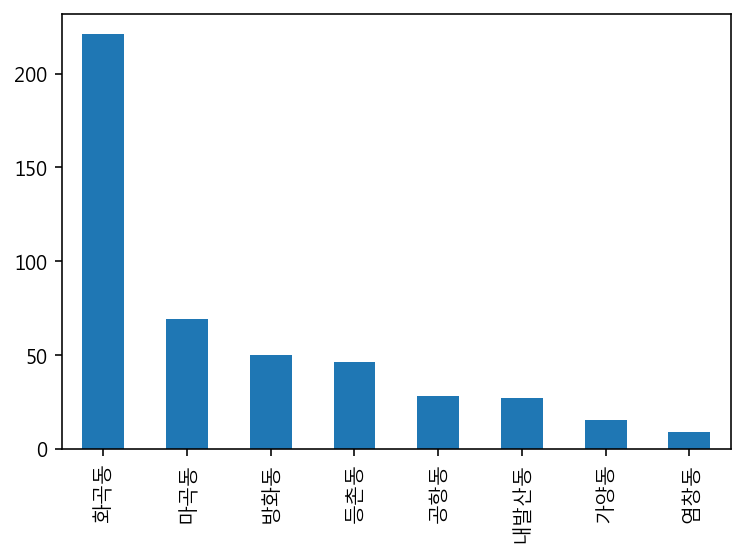

In [43]:
dongs.plot(kind='bar')